In [1]:
import matplotlib.pyplot as plt
import collections
import time
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [2]:
def purity(result, label):

    total_num = len(label)
    cluster_counter = collections.Counter(result)
    original_counter = collections.Counter(label)

    t = []
    for k in cluster_counter:
        p_k = []
        for j in original_counter:
            count = 0
            for i in range(len(result)):
                if result[i] == k and label[i] == j: # 求交集
                    count += 1
            p_k.append(count)
        temp_t = max(p_k)
        t.append(temp_t)
    
    print("purity = " + str(sum(t)/total_num))

In [3]:
iris=datasets.load_iris()
X=iris.data
X=X[:,2:4]

In [4]:
clk_id = time.CLOCK_REALTIME 

t1 = time.clock_gettime(clk_id)

clustering=DBSCAN(eps=0.3,min_samples=10).fit(X)
purity(iris.target,clustering.labels_)

t2 = time.clock_gettime(clk_id)

print("cost_time = " + str(t2 - t1))
print(iris.target)
print(clustering.labels_)

purity = 0.86
cost_time = 0.004523515701293945
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


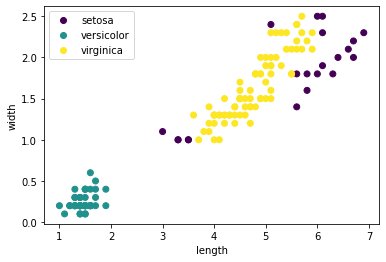

In [5]:
# 這張圖用KMeans分群好的label來作圖
scatter = plt.scatter(X[:,0],X[:,1],c=clustering.labels_)
plt.xlabel('length')
plt.ylabel('width')
plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())
plt.show()